In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'font.family': 'sans serif'})
plt.rcParams.update({'mathtext.default':'regular'})
plt.rcParams.update({'mathtext.fontset':'stixsans'})
plt.rcParams.update({'axes.linewidth': 1.5})
plt.rcParams.update({'xtick.direction':'in'})
plt.rcParams.update({'xtick.major.size': 5})
plt.rcParams.update({'xtick.major.width': 1.25 })
plt.rcParams.update({'xtick.minor.size': 2.5})
plt.rcParams.update({'xtick.minor.width': 1.25 })
plt.rcParams.update({'ytick.direction':'in'})
plt.rcParams.update({'ytick.major.size': 5})
plt.rcParams.update({'ytick.major.width': 1.25 })
plt.rcParams.update({'ytick.minor.size': 2.5})
plt.rcParams.update({'ytick.minor.width': 1.25 })

import warnings
warnings.filterwarnings("ignore")

import glob
import os
os.chdir("../python/")
import dust_integrator
os.chdir("../cuda/")

T_colors = ["lightskyblue", "violet", "forestgreen", "darkviolet", "thistle", "cadetblue", 
            "palegoldenrod", "darksalmon", "indigo"]

YR_IN_S = 3.154e7

In [29]:
ofiles = sorted(glob.glob(os.path.join("*.txt")))
t_arr = []
d_dust = []
temp = []
n = []
tau_sp = []
dd_dt = []
dd = []
time_refine = []

for ofile in ofiles:
    t_arr_i = []
    d_dust_i = []
    temp_i = []
    n_i = []
    tau_sp_i = []
    dd_dt_i = []
    dd_i = []
    time_refine_i = []
    with open(ofile) as f:
        for line in f:
            line = line.split(",")
            t_arr_i.append(float(line[0]))
            d_dust_i.append(float(line[1]))
            temp_i.append(float(line[2]))
            n_i.append(float(line[3]))
            tau_sp_i.append(float(line[4]))
            dd_dt_i.append(float(line[5]))
            dd_i.append(float(line[6]))
            time_refine_i.append(float(line[7]))

    t_arr_i = np.array(t_arr_i)
    d_dust_i = np.array(d_dust_i)
                      
    t_arr.append(t_arr_i)
    d_dust.append(d_dust_i)

    temp.append(np.average(temp_i))
    n.append(np.average(n_i))
    tau_sp.append(np.average(tau_sp_i))

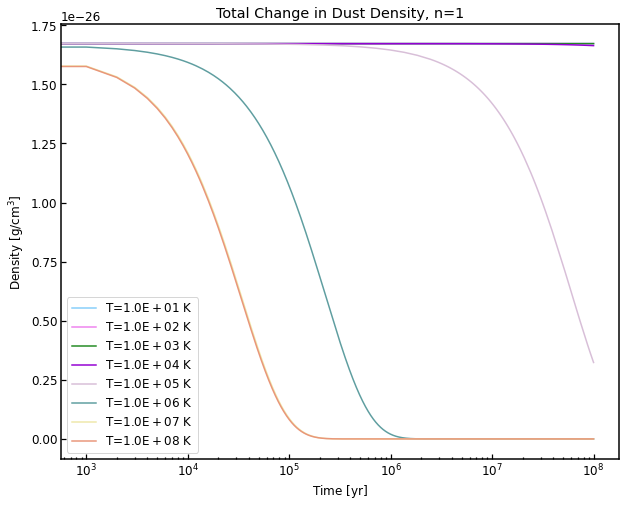

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 8))

for i, T in enumerate(temp):
    ax.semilogx(t_arr[i], d_dust[i], label=f"T=${T:.1E}~K$", color=T_colors[i])
    # ax.vlines(tau_sp[i], ymin=np.amin(d_dust[i]), ymax=np.amax(d_dust[i]), color="k", linestyle="--", zorder=0, label=r"$\tau_{sp}$")
ax.set_xlabel("Time$~[yr]$")
ax.set_ylabel(r"Density$~[g/cm^3]$")
ax.set_title(f"Total Change in Dust Density, n={1}")
ax.legend(loc="lower left")

In [31]:
dd, dm, tau_gs, tau_sps, integrators = dust_integrator.evolve_solutions(1e3, 1e0, temp, 1e8, "sp")

Gas temperature: 1.0E+01 K
Gas initial mass density: 1.67260E-24 g/cm^3
Gas initial number density: 1.0 cm^-3
Growth timescale: 2.82849E+08 yr
Destruction timescale: 1.82482E+18 yr
Time-step: 1000.0 yr
------------------------------------------
Gas temperature: 1.0E+02 K
Gas initial mass density: 1.67260E-24 g/cm^3
Gas initial number density: 1.0 cm^-3
Growth timescale: 8.94446E+07 yr
Destruction timescale: 5.77058E+15 yr
Time-step: 1000.0 yr
------------------------------------------
Gas temperature: 1.0E+03 K
Gas initial mass density: 1.67260E-24 g/cm^3
Gas initial number density: 1.0 cm^-3
Growth timescale: 2.82849E+07 yr
Destruction timescale: 1.82482E+13 yr
Time-step: 1000.0 yr
------------------------------------------
Gas temperature: 1.0E+04 K
Gas initial mass density: 1.67260E-24 g/cm^3
Gas initial number density: 1.0 cm^-3
Growth timescale: 8.94446E+06 yr
Destruction timescale: 5.77059E+10 yr
Time-step: 1000.0 yr
------------------------------------------
Gas temperature: 1.0

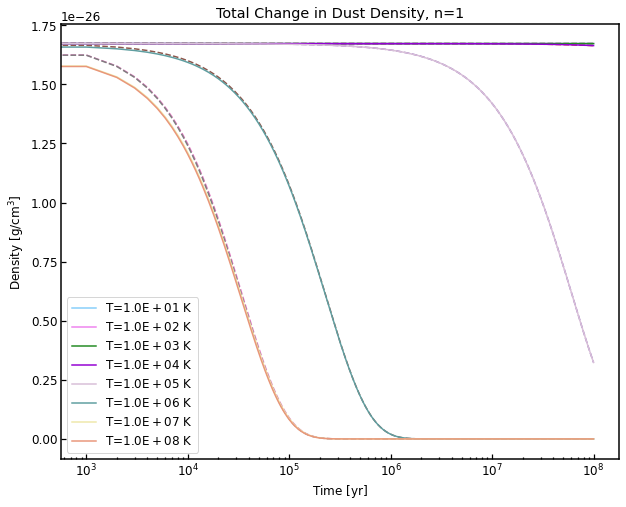

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 8))

for i, T in enumerate(temp):
    ax.semilogx(np.arange(0, integrators[i].tmax/integrators[i].YR_IN_S, integrators[i].dt/integrators[i].YR_IN_S), dd[i], linestyle="--")
    #ax.vlines(tau_sps[i]/integrators[i].YR_IN_S, ymin=np.amin(dd_i), ymax=np.amax(dd_i), color="k", linestyle="--", zorder=0)
    ax.set_xlabel("Time$~[yr]$")
    ax.set_ylabel(r"Density$~[g/cm^3]$")
    ax.set_title(f"change in dust density due to sputtering, n={integrators[i].n}")

for i, T in enumerate(temp):
    ax.semilogx(t_arr[i], d_dust[i], label=f"T=${T:.1E}~K$", color=T_colors[i])
    # ax.vlines(tau_sp[i], ymin=np.amin(d_dust[i]), ymax=np.amax(d_dust[i]), color="k", linestyle="--", zorder=0, label=r"$\tau_{sp}$")
ax.set_xlabel("Time$~[yr]$")
ax.set_ylabel(r"Density$~[g/cm^3]$")
ax.set_title(f"Total Change in Dust Density, n={1}")
ax.legend()

Text(0.5, 0, 'Time$~[yr]$')

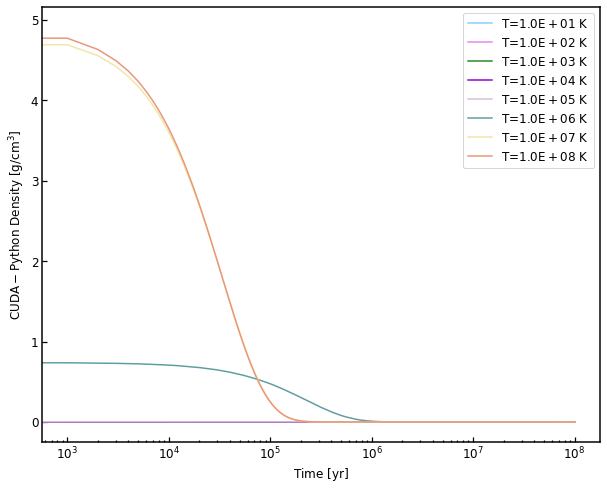

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 8))
for i, T in enumerate(temp):
    ax.semilogx(t_arr[i], np.abs(d_dust[i]-dd[i])*1e28, label=f"T=${T:.1E}~K$", color=T_colors[i])
ax.legend()
ax.set_ylabel(r"$CUDA - Python$ Density$~[g/cm^3]$")
ax.set_xlabel("Time$~[yr]$")

Text(0.5, 0, 'Time$~[yr]$')

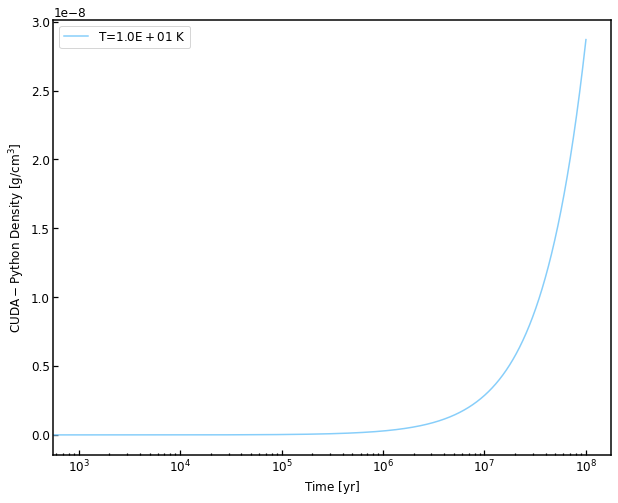

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 8))
ax.semilogx(t_arr[0], np.abs(d_dust[0]-dd[0])*1e28, label=f"T=${temp[0]:.1E}~K$", color=T_colors[0])
ax.legend()
ax.set_ylabel(r"$CUDA - Python$ Density$~[g/cm^3]$")
ax.set_xlabel("Time$~[yr]$")

Text(0.5, 0, 'Time$~[yr]$')

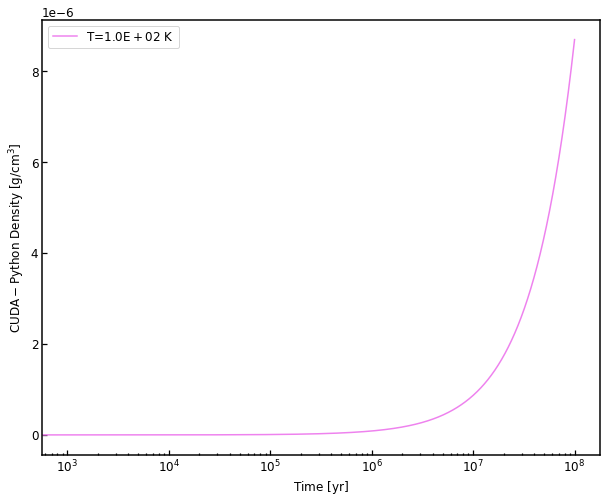

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 8))
ax.semilogx(t_arr[1], np.abs(d_dust[1]-dd[1])*1e28, label=f"T=${temp[1]:.1E}~K$", color=T_colors[1])
ax.legend()
ax.set_ylabel(r"$CUDA - Python$ Density$~[g/cm^3]$")
ax.set_xlabel("Time$~[yr]$")

Text(0.5, 0, 'Time$~[yr]$')

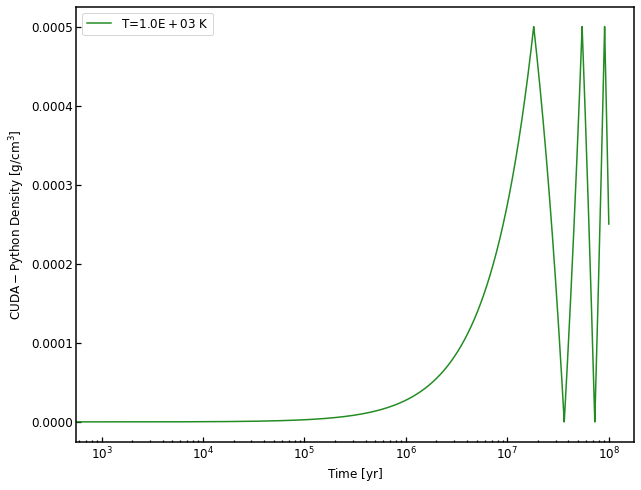

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 8))
ax.semilogx(t_arr[2], np.abs(d_dust[2]-dd[2])*1e28, label=f"T=${temp[2]:.1E}~K$", color=T_colors[2])
ax.legend()
ax.set_ylabel(r"$CUDA - Python$ Density$~[g/cm^3]$")
ax.set_xlabel("Time$~[yr]$")

Text(0.5, 0, 'Time$~[yr]$')

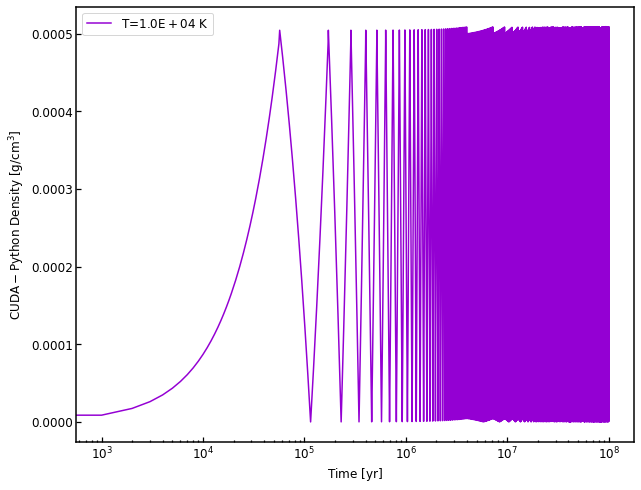

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 8))
ax.semilogx(t_arr[3], np.abs(d_dust[3]-dd[3])*1e28, label=f"T=${temp[3]:.1E}~K$", color=T_colors[3])
ax.legend()
ax.set_ylabel(r"$CUDA - Python$ Density$~[g/cm^3]$")
ax.set_xlabel("Time$~[yr]$")

Text(0.5, 0, 'Time$~[yr]$')

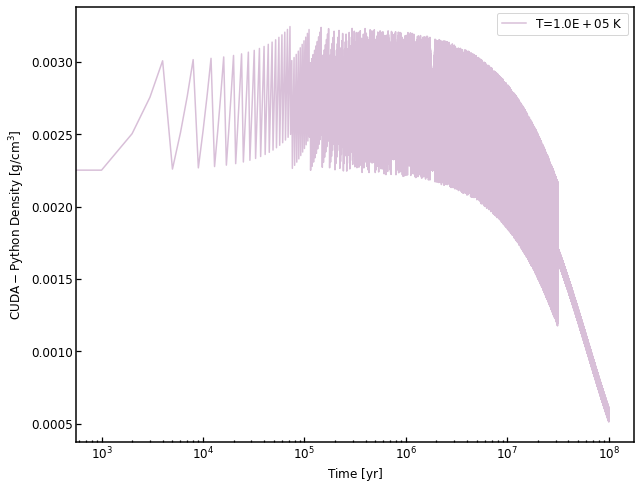

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 8))
ax.semilogx(t_arr[3], np.abs(d_dust[4]-dd[4])*1e28, label=f"T=${temp[4]:.1E}~K$", color=T_colors[4])
ax.legend()
ax.set_ylabel(r"$CUDA - Python$ Density$~[g/cm^3]$")
ax.set_xlabel("Time$~[yr]$")

Text(0.5, 0, 'Time$~[yr]$')

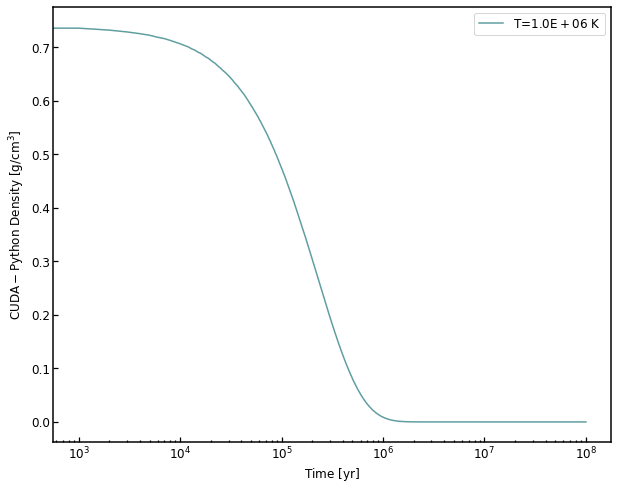

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 8))
ax.semilogx(t_arr[5], np.abs(d_dust[5]-dd[5])*1e28, label=f"T=${temp[5]:.1E}~K$", color=T_colors[5])
ax.legend()
ax.set_ylabel(r"$CUDA - Python$ Density$~[g/cm^3]$")
ax.set_xlabel("Time$~[yr]$")

Text(0.5, 0, 'Time$~[yr]$')

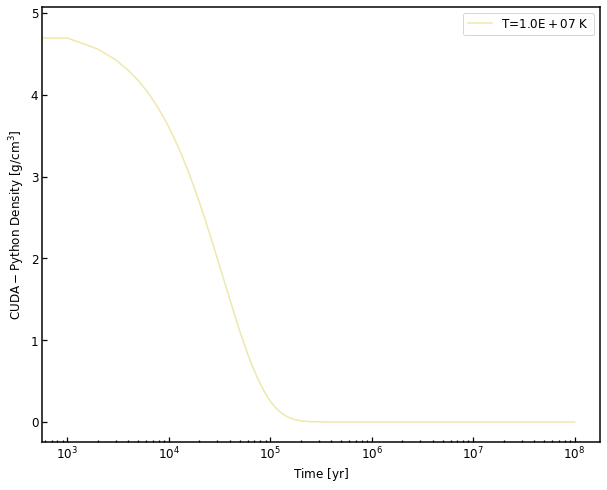

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 8))
ax.semilogx(t_arr[6], np.abs(d_dust[6]-dd[6])*1e28, label=f"T=${temp[6]:.1E}~K$", color=T_colors[6])
ax.legend()
ax.set_ylabel(r"$CUDA - Python$ Density$~[g/cm^3]$")
ax.set_xlabel("Time$~[yr]$")